# Day 4 - Data Science Essentials Program

**Agenda**
- Model selection and cross validation
- Different types of train/test splitting

**Before we get started**
- Open the `ModelSelection.ipynb` file
- Slides page 84
- import packages and the car data set (can copy codes from ModelSelection file)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

#New package
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (KFold, StratifiedKFold, GroupKFold)

In [5]:
df = pd.read_csv("ExData\car_data.csv", index_col=['User ID'])
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)

In [6]:
df['Purchased'].value_counts()

Purchased
0    598
1    402
Name: count, dtype: int64

## Cross Validation Scores
- `cross_val_score(model, X, y, cv=numbers of tests, scoring=metric)`
    - classification models - by default uses "accuracy" metric (but you can change to recall, precision, etc.)
    - linear regression - r^2
    - https://scikit-learn.org/stable/modules/model_evaluation.html

In [12]:
clf = tree.DecisionTreeClassifier(random_state=42)
X = df[['AnnualSalary','Age']]
y = df['Purchased']
scores = cross_val_score(clf, X, y, cv=5) #default is cv=5, 5 diff tests
        #5 different accuracy scores for the 5 tests
scores, scores.mean(), scores.std(), scores.min()

(array([0.845, 0.855, 0.89 , 0.855, 0.845]),
 0.858,
 0.016613247725836167,
 0.845)

In [8]:
scores = cross_val_score(clf, X, y, cv=5, scoring='recall')
scores

array([0.875     , 0.8125    , 0.8625    , 0.80246914, 0.77777778])

In [13]:
clf = tree.DecisionTreeClassifier(random_state=42)
X2 = df[['Age']]
y = df['Purchased']
scores = cross_val_score(clf, X2, y, cv=5) #default is cv=5, 5 diff tests
        #5 different accuracy scores for the 5 tests
scores, scores.mean(), scores.std(), scores.min()

(array([0.805, 0.825, 0.85 , 0.8  , 0.82 ]),
 0.8200000000000001,
 0.01760681686165898,
 0.8)

## Train/Test Split the Data
- before running the cross validation score, split your data first into train/test
- run cross_val on JUST the TRAIN data for diff permutations of X variables (e.g. Age on its own, Age w Salary, etc.)
- pick the best model based off the cross_val score, then re-train with **ALL** the **TRAIN** data
- one final test on the TEST data

In [14]:
allXs = ['Age','AnnualSalary','Female']
X_train, X_test, y_train, y_test = train_test_split(df[allXs], df['Purchased'], test_size=0.2, random_state=0)

In [29]:
#X_train[['Age','AnnualSalary','Female']]

In [20]:
cross_val_score(clf, X_train, y_train, cv=5) #all 3 X's

array([0.80625, 0.91875, 0.88125, 0.85625, 0.85   ])

In [21]:
cross_val_score(clf, X_train[['Age']], y_train, cv=5) #all 3 X's

array([0.8    , 0.85   , 0.76875, 0.83125, 0.8375 ])

In [30]:
cross_val_score(clf, X_train[['Age','AnnualSalary']], y_train, cv=5) #all 3 X's

array([0.80625, 0.90625, 0.85625, 0.85   , 0.84375])

In [24]:
finalXs = ['Age','AnnualSalary']
clf.fit(X_train[finalXs], y_train) #building the final model

DecisionTreeClassifier(random_state=42)

In [26]:
clf.score(X_train[finalXs], y_train)

0.9925

In [25]:
clf.score(X_test[finalXs], y_test)

0.905

**Coffee break for 15 min until 10:15am BST / 5:15am EST**

**Q: how to quickly create permutations/combinations of the x-variables**
A: use itertools combinations formula
- `combinations(list of headers, x)`, where x is the # of headers to use
- can then use a for loop to run different numbers

See example below

In [48]:
import itertools
test = ['Age', 'Salary', 'Female','City','Title','Company']
combos = itertools.combinations(test, 2)
splits = [x for x in combos]
# splits

In [52]:
# list1 = [1, 4, 5]
# list2 = [6, 7]
# list1.extend(list2)
# list1

In [54]:
import itertools
#allXs = ['Age', 'Salary', 'Female','City','Title','Company']
allXs = ['Age', 'AnnualSalary', 'Female']
allCombos = []
for num in range(1,len(allXs)+1):
    combos = itertools.combinations(allXs, num)
    splits = [x for x in combos]
    allCombos.extend(splits)
len(allCombos), allCombos

(7,
 [('Age',),
  ('AnnualSalary',),
  ('Female',),
  ('Age', 'AnnualSalary'),
  ('Age', 'Female'),
  ('AnnualSalary', 'Female'),
  ('Age', 'AnnualSalary', 'Female')])

## Using different split methods for the folds
- for classifier models, when you use the `cross_val_score`, automatically does a Stratified cut
    - keeps proportions of 0/1s in the train/test of the cross validations
- you can pick your own type of cut
- come up a variable to the does cut
    - e.g. `cv = StratifiedKFold()`
- cross_val_score(... cv = variable that you made) instead of cv = 5

In [55]:
cvCut = StratifiedKFold(n_splits=5)
cross_val_score(clf, X_train[['Age']], y_train, cv=cvCut)

array([0.8    , 0.85   , 0.76875, 0.83125, 0.8375 ])

In [56]:
cross_val_score(clf, X_train[['Age']], y_train, cv=5) 

array([0.8    , 0.85   , 0.76875, 0.83125, 0.8375 ])

## Example of GroupKFold
- we're going to create different Age groups, and try running different models where we "keep out" one group

In [59]:
np.linspace(18,63,6)

array([18., 27., 36., 45., 54., 63.])

In [60]:
df['AgeGroup'] = 0
df.loc[(df['Age'] >= 18) & (df['Age'] <=26), 'AgeGroup'] = 1
df.loc[(df['Age'] >= 27) & (df['Age'] <=35), 'AgeGroup'] = 2
df.loc[(df['Age'] >= 36) & (df['Age'] <=44), 'AgeGroup'] = 3
df.loc[(df['Age'] >= 45) & (df['Age'] <=53), 'AgeGroup'] = 4
df.loc[(df['Age'] >= 54) & (df['Age'] <=62), 'AgeGroup'] = 5
df.loc[(df['Age'] >= 63), 'AgeGroup'] = 6

df.head(5)

,Gender,Age,AnnualSalary,Purchased,Female,Male,AgeGroup
User ID,,,,,,,
385,Male,35,20000,0,False,True,2
681,Male,40,43500,0,False,True,3
353,Male,49,74000,0,False,True,4
895,Male,40,107500,1,False,True,3
661,Male,25,79000,0,False,True,1


In [61]:
df['AgeGroup'].value_counts()

AgeGroup
3    340
4    213
2    210
5    116
1    114
6      7
Name: count, dtype: int64

In [62]:
df.groupby(['AgeGroup'])[['Age','AnnualSalary']].agg(['min','max','mean','count'])

Age                      AnnualSalary                            
         min max       mean count          min     max          mean count
AgeGroup                                                                  
1         18  26  22.692982   114        15000  118000  55767.543860   114
2         27  35  30.985714   210        15000  151500  69254.761905   210
3         36  44  39.655882   340        21500  150500  77164.705882   340
4         45  53  48.657277   213        20000  151500  73244.131455   213
5         54  62  57.965517   116        23000  152500  81693.965517   116
6         63  63  63.000000     7        36500  110500  67785.714286     7

In [63]:
df.groupby(['AgeGroup'])['Purchased'].value_counts()

AgeGroup  Purchased
1         0            114
2         0            179
          1             31
3         0            248
          1             92
4         1            163
          0             50
5         1            109
          0              7
6         1              7
Name: count, dtype: int64

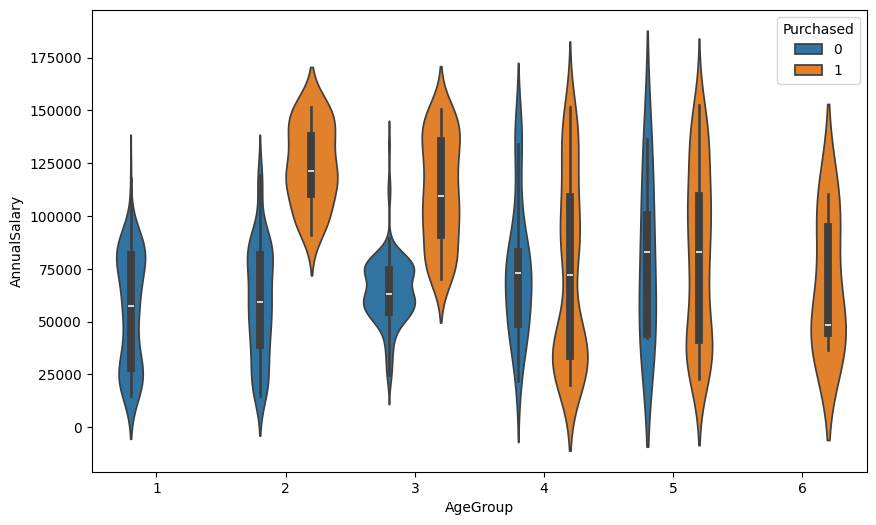

In [66]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='AgeGroup', y='AnnualSalary', hue='Purchased' )
plt.show()

In [77]:
# df.head()

In [71]:
cv = GroupKFold(n_splits=6)  # Must me less than or equal to number of groups
cv.split(df[['AnnualSalary', 'Female']], df['Purchased'], groups=df['AgeGroup'])

<generator object _BaseKFold.split at 0x0000022B85C69820>

In [74]:
df.columns

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased', 'Female', 'Male',
       'AgeGroup'],
      dtype='object')

In [75]:
predictCols = [1, 2, 4]  #cols 1, 2, 4 = Age, AnnualSalary, Female
#predictCols = [2, 4] #try running with Age removed
targetCol = [3] #col 3 = Purchased
scores = [] #to keep the scores of all trained models

for train_index, test_index in cv.split(df[['AnnualSalary', 'Female']], df['Purchased'], groups=df['AgeGroup']):
    print("Hold-out group:",df.iloc[test_index, -1].unique()) #print out which test group was hold out
    
    clf.fit(df.iloc[train_index, predictCols], df.iloc[train_index, targetCol])
    score = clf.score(df.iloc[test_index, predictCols], df.iloc[test_index, targetCol])
    scores.append(score)
    print("Score:",score)
    print(classification_report(df.iloc[test_index, targetCol], clf.predict(df.iloc[test_index, predictCols])))
    print("-" * 100)

Hold-out group: [3]
Score: 0.8529411764705882
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       248
           1       0.76      0.66      0.71        92

    accuracy                           0.85       340
   macro avg       0.82      0.79      0.81       340
weighted avg       0.85      0.85      0.85       340

----------------------------------------------------------------------------------------------------
Hold-out group: [4]
Score: 0.6056338028169014
              precision    recall  f1-score   support

           0       0.33      0.68      0.45        50
           1       0.86      0.58      0.69       163

    accuracy                           0.61       213
   macro avg       0.59      0.63      0.57       213
weighted avg       0.73      0.61      0.64       213

----------------------------------------------------------------------------------------------------
Hold-out group: [2]
Score: 0.8952380952380953
      

## Working Session until 11:30am BST / 6:30 am EST
- ModelSelectionAssignment.ipynb - copy it over from Assignments folder

## Takeup - GroupK Fold

In [88]:
#Add codes for logistic
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df['AnnualSalaryStd'] = StandardScaler().fit_transform(df[['AnnualSalary']])

In [89]:
clf_DT = tree.DecisionTreeClassifier(random_state=42)
clf_LogR = LogisticRegression(random_state=42)

In [91]:
cv = GroupKFold(n_splits=6)
allXs = ['Age','AnnualSalary','Female','AgeGroup','AnnualSalaryStd']
X_train, X_test, y_train, y_test = train_test_split(df[allXs], df['Purchased'],
                                                    test_size=0.2,
                                                    random_state=0)

**Cross Val Score Model with just salary and gender**

In [95]:
#Decision tree
cols = ['AnnualSalary','Female']
scores_DT = cross_val_score(clf_DT, X_train[cols], y_train, groups=X_train['AgeGroup'], cv=cv)
scores_DT, scores_DT.mean(), scores_DT.std()

(array([0.77859779, 0.43023256, 0.79289941, 0.52688172, 0.69662921,
        0.33333333]),
 0.5930956699413342,
 0.17485084851750832)

In [96]:
#Logistic regression
cols = ['AnnualSalaryStd','Female']
scores_Log = cross_val_score(clf_LogR, X_train[cols], y_train, groups=X_train['AgeGroup'], cv=cv)
scores_Log, scores_Log.mean(), scores_Log.std()

(array([0.79704797, 0.4244186 , 0.79881657, 0.37634409, 0.84269663,
        0.33333333]),
 0.5954428652910878,
 0.2195050814645907)

In [97]:
#Decision Tree - age added in
cols = ['AnnualSalary','Female','Age']
scores_DT = cross_val_score(clf_DT, X_train[cols], y_train, groups=X_train['AgeGroup'], cv=cv)
scores_DT, scores_DT.mean(), scores_DT.std()

(array([0.8302583 , 0.59883721, 0.8816568 , 0.75268817, 1.        ,
        1.        ]),
 0.8439067481103483,
 0.14066595233784826)

In [98]:
#Logistic regression - age added in
cols = ['AnnualSalaryStd','Female','Age']
scores_Log = cross_val_score(clf_LogR, X_train[cols], y_train, groups=X_train['AgeGroup'], cv=cv)
scores_Log, scores_Log.mean(), scores_Log.std()

(array([0.77490775, 0.47674419, 0.84023669, 0.93548387, 1.        ,
        1.        ]),
 0.8378954154137128,
 0.18096152329474036)

## Wraup-UP
- https://www.surveymonkey.com/r/VFQYMNL
- github: https://github.com/TheMarqueeGroup/JPM_DS_Oct2023
- all answer keys will be on here; will also send a consolidated zip file
- github will stay up for 1 more week
- extra resources:
    - https://scikit-learn.org/stable/index.html
    - https://bogdan.streamlit.app/